# Abalone Dataset

Link of the dataset: [https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data)

- **Author:** BrenoAV
- **Last modified date:** 10-28-2023

# Load Dataset

In [1]:
import pandas as pd

In [2]:
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
)
headers = ["sex", "length", "diameter", "height", "whole_height", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
abalone_df = pd.read_csv(url, header=None, names=headers)

In [3]:
abalone_df.head()

,sex,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# We won't use the sex to predict the number of rings
abalone_df.drop(columns=["sex"], inplace=True)  

# Exploring Dataset

In [5]:
import matplotlib.pyplot as plt

In [6]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   whole_height    4177 non-null   float64
 4   shucked_weight  4177 non-null   float64
 5   viscera_weight  4177 non-null   float64
 6   shell_weight    4177 non-null   float64
 7   rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## Target Variable Analysis

In [7]:
abalone_df["rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

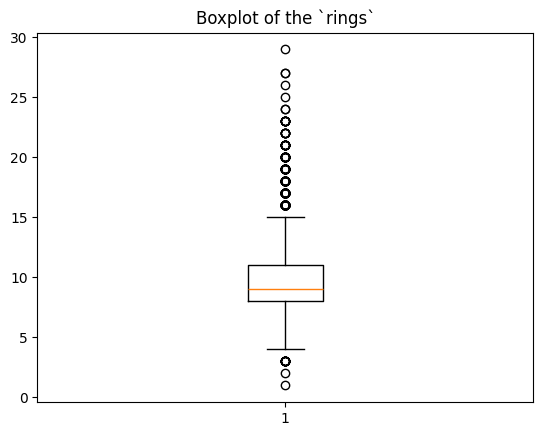

In [8]:
plt.boxplot(x=abalone_df["rings"])
plt.title("Boxplot of the `rings`")
plt.show()

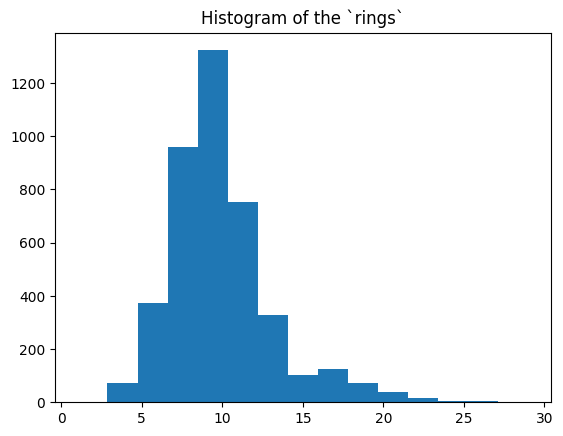

In [9]:
plt.hist(x=abalone_df["rings"], bins=15)
plt.title("Histogram of the `rings`")
plt.show()

- The Box Plot shows some "outliers", but it's not correct per se remove them because it is related to the nature of variation of the variable (natural variation).
- The histogram shows us that the values follow a normal distribution

## Correlation of the variables with the target

In [10]:
corr_matrice = abalone_df.corr()
corr_matrice

,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_height,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Seems that shell_weight is the variable more correlated with the rings variable, let's check the 2D graph

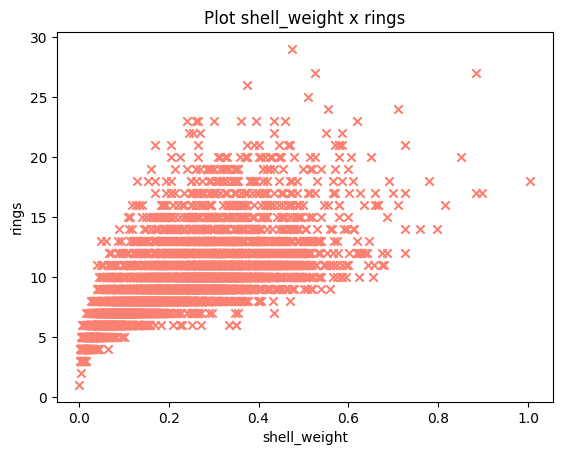

In [11]:
plt.scatter(x=abalone_df["shell_weight"], y=abalone_df["rings"], marker="x", color="salmon", label="shell_weight")
plt.title("Plot shell_weight x rings")
plt.xlabel("shell_weight")
plt.ylabel("rings")
plt.show()

It does not seem is a linear relation with the shell_weights or other variables.

# Split dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = abalone_df.drop("rings", axis=1)
y = abalone_df[["rings"]]

In [14]:
X = X.values

In [15]:
y = y.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# KNN

## From Scratch

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [44]:
# This is my implementation from scratch of the KNN Algorithm
# More implementations here: https://github.com/BrenoAV/ml-from-scratch
import sys
sys.path.append("/home/brenoav/GitHub/ml-from-scratch/")
from src.knn import KNNRegressor

knn = KNNRegressor(X, y)
y_preds = []
for x in X_test:
    y_preds.append(knn.predict(x, k=3))
mse = mean_squared_error(y_test, y_preds)
rmse = mean_squared_error(y_test, y_preds, squared=False)
print(f"MSE Error = {mse:.4f}\nRMSE Error = {rmse:.4f}")

MSE Error = 2.8134
RMSE Error = 1.6773


## Scikit-Learn

I'll use GridSearchCV to test a lot of n_neighbors (1~30) and cross validation with 5 folders (default)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [48]:
parameters = {"n_neighbors": range(1, 30)}

In [49]:
knn = KNeighborsRegressor()

In [53]:
reg = GridSearchCV(knn, param_grid=parameters)
reg.fit(X_train, y_train)
print("--- Best Parameters ---")
print(reg.best_params_)
print("--- Score ---")
print(f"{reg.best_score_:.4f}")


--- Best Parameters ---
{'n_neighbors': 15}
--- Score ---
0.5527


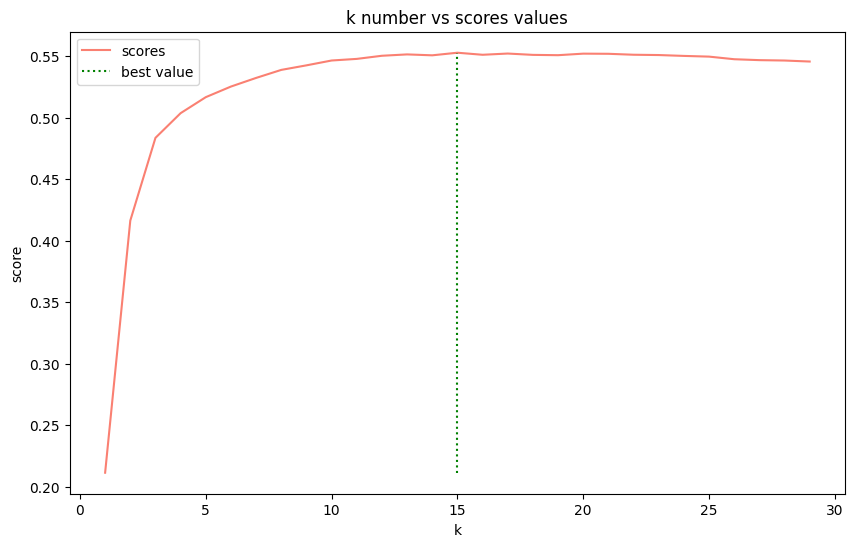

In [64]:
# Obtain the scores for different k values
scores = reg.cv_results_["mean_test_score"]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), scores, color="salmon", label="scores")
plt.vlines(x=reg.best_params_["n_neighbors"], 
           ymin=min(scores), ymax=max(scores), 
           linestyle="dotted", 
           color="green", 
           label="best value")
plt.title("k number vs scores values")
plt.xlabel("k")
plt.ylabel("score")
plt.legend()
plt.show()

## Metrics on the test dataset

In [65]:
y_pred = reg.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [67]:
print(f"MSE Error = {mse:.4f}\nRMSE Error = {rmse:.4f}")

MSE Error = 4.5570
RMSE Error = 2.1347


The algorithm using the L1 distance created from scratch performs better on this dataset than the scikit-learn 😵‍💫